**Homework 10**

In this assignment we'll play with image manipulation. To begin, we add some functionality to python:

---



In [ ]:
from matplotlib.pyplot import imshow #command to display a 2D array as an image
from imageio import imread #command to read images from a file or url

In class we saw how to make a list-of-lists of any size. This will be useful here to create a "blank" image that we will re-assign to be a modified version of some other image. Here's the code form class:

In [ ]:
def ArrayOfZeros(n,m):
  array=[]
  for i in range(n):
    array=array+[[]]
    for j in range(m):
      array[i]=array[i]+[0]
  return array

ArrayOfZeros(5,5)

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

Now let's look at a nice picture of a coffee cup:

Imageio: 'coffee.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/coffee.png (441 kB)
Downloading: 8192/451102 bytes (1.8%)451102/451102 bytes (100.0%)
  Done
File saved as /root/.imageio/images/coffee.png.


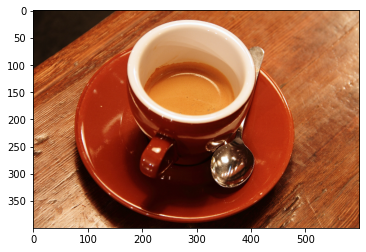

In [ ]:
coffee=imread('imageio:coffee.png')
imshow(coffee)

Internally, the variable 'coffee' now represents a 400 by 600 list of lists. To manipulate it, we must use nested for-loops. For example, the following code flips an image over a horizontal line, so that the top becomes the bottom and vice versa, by swapping the pixel at [i][j] with the pixel at [399-i][j].

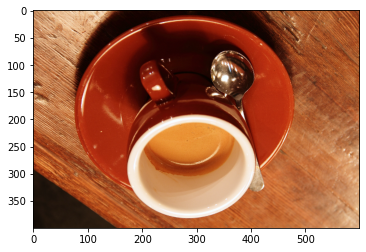

In [ ]:
def VertFlip(image):
  newimage=ArrayOfZeros(400,600)
  for i in range(400):
    for j in range(600):
      newimage[i][j]=image[399-i][j]
  return newimage

imshow(VertFlip(coffee))

*Problem 0*

Write a function 'HorizFlip' that flips the image over a vertical line.

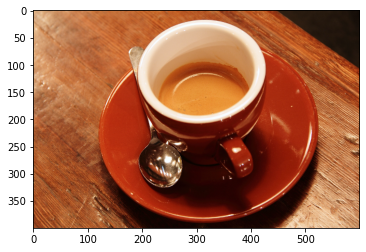

In [ ]:
def HorizFlip(image):
  newimage=ArrayOfZeros(400,600)
  for i in range(400):
    for j in range(600):
      newimage[i][j]=image[i][599-j]
  return newimage

imshow(HorizFlip(coffee))


In [ ]:
HorizFlip(coffee)[100][100][2], HorizFlip(coffee)[150][150][1]

(57, 217)

*Problem 1.*

Write a function 'Rotate180' that rotates the image 180 degrees.

(*Hint:* A 180 degree rotation is a vertical flip followed by a horizontal flip.)

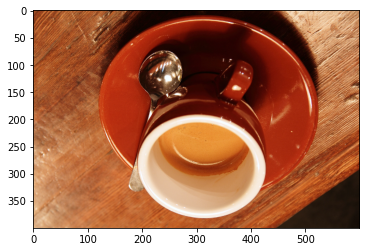

In [ ]:
def Rotate180(image):
  newimage=VertFlip(image)
  return HorizFlip(newimage)

imshow(Rotate180(coffee))

In [ ]:
Rotate180(coffee)[100][100][2], Rotate180(coffee)[150][150][1]

(34, 45)

*Problem 2.*

Write a function 'SwapLeftRight' which swaps the left and right halves of the image.

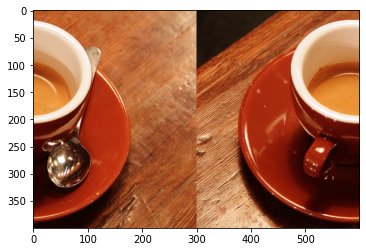

In [ ]:
def SwapLeftRight(image):
  newimage=ArrayOfZeros(400,600)
  for i in range(400):
    for j in range(600):
      if j<300:
        newimage[i][j]=image[i][j+300]
      else:
        newimage[i][j]=image[i][j-300]
  return newimage

imshow(SwapLeftRight(coffee))


In [ ]:
SwapLeftRight(coffee)[100][100][2], SwapLeftRight(coffee)[150][150][1]

(236, 199)


Each pixel in an image is itself a list of three integers, between 0 and 255, representing the amount of red, green, and blue.

We can use this to manipulate the color in an image. For exampe, the following code just displays the amount of red in each pixel.

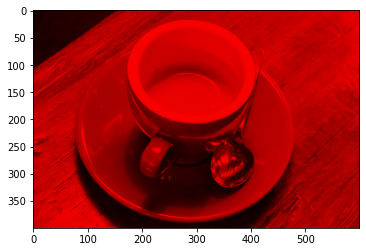

In [ ]:
def RedImage(image):
  newimage=ArrayOfZeros(400,600)
  for i in range(400):
    for j in range(600):
      newimage[i][j]=[image[i][j][0],0,0]
  return newimage

imshow(RedImage(coffee))

*Problem 3.*

Write a function `GreenBlueSwap` that swaps the amount of green and blue in each pixel (leaving the amount of red alone).

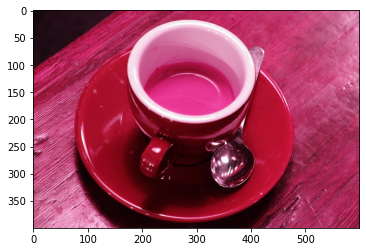

In [ ]:
def GreenBlueSwap(image):
  newimage=ArrayOfZeros(400,600)
  for i in range(400):
    for j in range(600):
      newimage[i][j]=[image[i][j][0],image[i][j][2],image[i][j][1]]
  return newimage

imshow(GreenBlueSwap(coffee))

In [ ]:
GreenBlueSwap(coffee)[100][100][2], GreenBlueSwap(coffee)[150][150][1]

(50, 17)

*Problem 4.*

Write a function 'BlackAndWhite' which takes a 400 by 600 image and converts it to black and white. Your function should do this by assigning the amounts of red, green, and blue in the new image to be the average of those values in the old image (rounded down to the nearest integer).

For example, if the rgb values for some pixel were [20,100,152], then the new pixel should be [90,90,90], because (20+100+152)/3=90.66666..., and 90=int(90.66666...).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


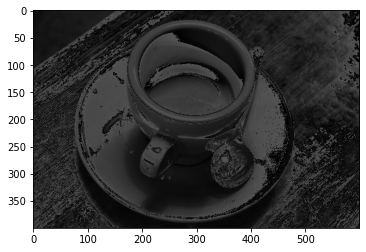

In [ ]:
def BlackAndWhite(image):
  newimage=ArrayOfZeros(400,600)
  for i in range(400):
    for j in range(600):
      value=int((image[i][j][2]+image[i][j][1]+image[i][j][0])/3)
      newimage[i][j]=[value, value, value]
  return newimage

imshow(BlackAndWhite(coffee))

In [ ]:
BlackAndWhite(coffee)[100][100][2], BlackAndWhite(coffee)[150][150][1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


(69, 78)

*Problem 5a.*

In part b of this problem you will write a function `Lighten` that takes an image and lightens it by adding a number n to the red, green, and blue values of every pixel. However, this can cause problems if we get numbers bigger than 255 for any color value.

To address this problem, first write a function `ShiftClip` that takes a value v and a number n, and returns either v+n or 255 (whichever is smaller). Python has a built-in `min` function that you may use to do this (but you don't have to).

```
ShiftClip(100,50)
>150

ShiftClip(150,175)
>255
```

In [ ]:
def ShiftClip(v,n):
  return min([v+n,255])

In [ ]:
ShiftClip(100,50)

150

In [ ]:
ShiftClip(150,175)

255

*Problem 5b.*

Write a function `Lighten` that takes an image and a number `n` and adds n to the red, green, and blue values for each pixel, being careful never to exceed 255. (You should use your `ShiftClip(v,n)` function in your code.

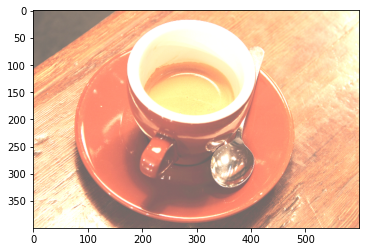

In [ ]:
def Lighten(image,n):
  newimage=ArrayOfZeros(400,600)
  for i in range(400):
    for j in range(600):
      newimage[i][j]=[ShiftClip(image[i][j][0],n),ShiftClip(image[i][j][1],n),ShiftClip(image[i][j][2],n)]
  return newimage

imshow(Lighten(coffee,100))



In [ ]:
Lighten(coffee,100)[100][100][2], Lighten(coffee,100)[150][150][1]

(118, 146)